# 1. Hashovane fingerprinty
- napocitani fingerprintu
- porovnani bitove hustoty
- zjisteni, co nastavuje dany bit
- podobnost fingerprintu

## Napocitani fingerprintu
obdobne jako MACCs keys

In [72]:
#from rdkit import Chem
#from rdkit.Chem import AllChem
from rdkit.Chem import AllChem as Chem #AllChem sada vsech funkci, ted se to bude chovat jako Chem

from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole #aby fungovalo: Draw.DrawMorganBit

In [5]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in suppl if m]

- vsechny fragmenty,ktere si navolime podle typu fingerprintu -> deterministicky vyhodnotime jako cisla -> bit
- struktura -> na fragmenty -> kazdemu fragmentu priradi cislo -> hashovani na bit string urcite delky (casto Morganovy a ?)
- fragment: zakladni -> rozsirovani o sousedni ... fragmenty do urcite vzdalenosti od urciteho atomu
- vsechny fragmenty definovane velikosti se ve fingerprintu odrazi,jsou povolene kolize
- viz: https://docs.chemaxon.com/display/docs/Chemical+Hashed+Fingerprint 
- cim vic fragmentu, tim jsou fingerprinty hustsi, tim vetsi sance kolizi (pri urcite delce)
- cim delsi, tim mene kolizi, ale vice pameti a prostredku na zpracovani
- obsahuje vsechny informace v molekule

In [57]:
#napocitani Morganovych fingerprintu:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]
#2 ... struktura: centralni atom (nulovy ... jen ten atom) + okoli 1 + okoli 2 => jak daleko se divam od atomu + cirkularni (od 0 po 2)
#okoli 0 + nastaveni bitu -> okoli 1 + nastaveni bitu -> okoli 2 + nastaveni bitu atd.
#stejne fragmenty (i z jineho atomu) -> kolize uvnitr

# => obdoba MACCs keys

In [7]:
len(morgan_fps)

7110

In [8]:
set(morgan_fps[666].GetOnBits())

{1,
 3,
 13,
 33,
 64,
 80,
 147,
 175,
 283,
 316,
 356,
 371,
 414,
 428,
 457,
 534,
 568,
 625,
 628,
 650,
 656,
 677,
 695,
 726,
 747,
 759,
 764,
 786,
 807,
 833,
 849,
 881,
 893,
 913,
 924,
 952,
 953,
 968,
 1019}

In [10]:
len(set(morgan_fps[666].GetOnBits()))
# 39 ruznych fragmentu
# ale nepostavime z nich molekulu

39

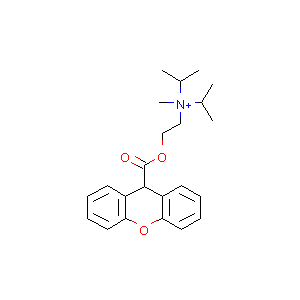

In [14]:
Draw.MolToImage(drugbank[666])

In [26]:
devil_fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=512)

In [27]:
print('delka:', len(set(devil_fp.GetOnBits())))
#stale bez kolize

set(devil_fp.GetOnBits())

delka: 39


{1,
 3,
 13,
 22,
 33,
 56,
 64,
 80,
 113,
 116,
 138,
 144,
 147,
 165,
 175,
 183,
 214,
 235,
 247,
 252,
 274,
 283,
 295,
 316,
 321,
 337,
 356,
 369,
 371,
 381,
 401,
 412,
 414,
 428,
 440,
 441,
 456,
 457,
 507}

In [23]:
devil_fp_10 = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=10)

In [28]:
print('delka:', len(set(devil_fp_10.GetOnBits())))
#obsazena informace je nesmyslna
#prilis male fingerprinty

set(devil_fp_10.GetOnBits())

delka: 10


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [31]:
devil_fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=10000)

In [32]:
print('delka:', len(set(devil_fp.GetOnBits())))
#stale jich je 39,bez zisku dalsi informace
# -> DB reprezentovana fingerprintem, u hashovanych lze pridat/ubrat siri informace

set(devil_fp.GetOnBits())

delka: 39


{18,
 348,
 708,
 875,
 1313,
 1977,
 2216,
 2611,
 2730,
 2881,
 2940,
 3601,
 3781,
 3787,
 3969,
 3984,
 4272,
 4487,
 5027,
 5576,
 5955,
 6017,
 6070,
 6502,
 6729,
 6844,
 6991,
 7409,
 7421,
 7552,
 7688,
 7724,
 7764,
 8189,
 8334,
 8407,
 8737,
 9515,
 9815}

## Porovnani bitove hustoty 
- u drugbank

In [38]:
morgan_fps_2_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]
morgan_fps_2_512 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=512) for m in drugbank]
morgan_fps_2_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in drugbank]

morgan_fps_3_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=1024) for m in drugbank]
morgan_fps_3_512 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=512) for m in drugbank]
morgan_fps_3_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=2048) for m in drugbank]

In [46]:
def fingerprint_density(fps):
    sum_on_bit_density = sum((len(fp.GetOnBits())/fp.GetNumBits() for fp in fps))
    average_on_bit_density = sum_on_bit_density/len(fps)
    return average_on_bit_density

In [47]:
    densities = [fingerprint_density(fps) for fps in (morgan_fps_2_512, morgan_fps_2_1024,morgan_fps_2_2048,morgan_fps_3_512, morgan_fps_3_1024,morgan_fps_3_2048)]

In [48]:
densities

[0.07596557445499297,
 0.038865813994374124,
 0.01966605957718003,
 0.10068345639943742,
 0.05196974441807314,
 0.026418213234001408]

In [49]:
avg_on_bits =[x*y for x,y in zip(densities,(512,1024,2048,512,1024,2048))]
avg_on_bits

[38.8943741209564,
 39.7985935302391,
 40.2760900140647,
 51.54992967651196,
 53.21701828410689,
 54.10450070323488]

- porovnani s MACCs

In [52]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]

In [54]:
fingerprint_density(drugbank_maccs), fingerprint_density(drugbank_maccs)*166

(0.26487447046834517, 43.9691620977453)

In [55]:
morgan_fps_2_166 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=166) for m in drugbank]
#kazdy 5-ty bit je nastaveny

In [56]:
fingerprint_density(morgan_fps_2_166), fingerprint_density(morgan_fps_2_166)*166

(0.21416128649620272, 35.55077355836965)

## Zjisteni, co nastavuje dany bit

In [61]:
bitinfo = {}
Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=512, bitInfo=bitinfo)
bitinfo
#tuple tuplu
#index centralniho atomu a okoli, kteremu fragment odpovida

{1: ((4, 0), (5, 0)),
 3: ((15, 1), (16, 1)),
 13: ((12, 1),),
 22: ((14, 1),),
 33: ((7, 0), (8, 0), (9, 0), (10, 0), (11, 0)),
 56: ((14, 2),),
 64: ((23, 1), (25, 1), (24, 1), (26, 1)),
 80: ((6, 0), (12, 0)),
 113: ((3, 2),),
 116: ((7, 1),),
 138: ((2, 0),),
 144: ((1, 0),),
 147: ((0, 1),),
 165: ((17, 2), (18, 2)),
 175: ((23, 2), (25, 2), (24, 2), (26, 2)),
 183: ((0, 0),),
 214: ((19, 1), (20, 1), (21, 1), (22, 1)),
 235: ((13, 1),),
 247: ((1, 2),),
 252: ((0, 2),),
 274: ((1, 1),),
 283: ((8, 1), (9, 1), (10, 1), (11, 1)),
 295: ((14, 0),),
 316: ((13, 2),),
 321: ((6, 2),),
 337: ((19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0)),
 356: ((15, 0), (16, 0), (17, 0), (18, 0)),
 369: ((17, 1), (18, 1)),
 371: ((19, 2), (20, 2)),
 381: ((2, 1),),
 401: ((6, 1),),
 412: ((3, 1),),
 414: ((3, 0),),
 428: ((12, 2),),
 440: ((4, 2), (5, 2)),
 441: ((15, 2), (16, 2)),
 456: ((4, 1), (5, 1)),
 457: ((21, 2), (22, 2)),
 507: ((13, 0),)}

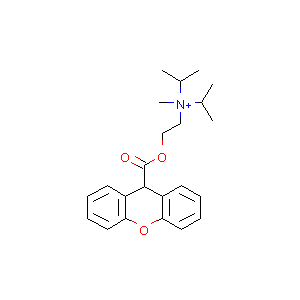

In [63]:
Draw.MolToImage(drugbank[666])

In [64]:
def bit2smales(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512, bitInfo=bitinfo)
    fragments = set()
    for hit,radius in bitinfo.get(bit,[]): #bere dvojice (atom, radius)
        if radius > 0:
            hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, hit) #najde okoli bitu daneho radiem
            submol = Chem.PathToSubmol(mol, hit_atoms)
            fragment_smiles = Chem.MolToSmiles(submol)
        else:
            fragment_smiles = mol.GetAtomWithIdx(hit).GetSymbol()
        fragments.add(fragment_smiles)
    return(fragments)

In [75]:
bit2smales(drugbank[666],337)

{'C'}

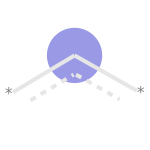

In [76]:
Draw.DrawMorganBit(drugbank[666],337,bitinfo)
#okoli 0

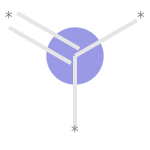

In [80]:
Draw.DrawMorganBit(drugbank[666],295,bitinfo)
#uhlik charakteristicky svoji vaznosti

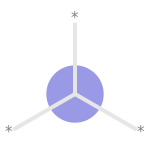

In [81]:
Draw.DrawMorganBit(drugbank[666],507,bitinfo)

In [77]:
bit2smales(drugbank[666],64)
#aromaticke uhliky

{'ccc'}

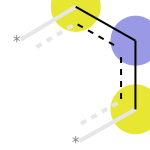

In [78]:
Draw.DrawMorganBit(drugbank[666],64,bitinfo)
#okoli 1

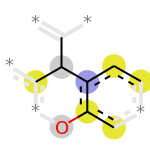

In [79]:
Draw.DrawMorganBit(drugbank[666],441,bitinfo)
#okoli 2

# 2. Podobnost fingerprintu - Tanimoto
- podobnostni vyhledavani (similarity search)
- kdyz chci neco podobneho nebo neco nepodobneho
- pouziva se cutoff 0.7
- steroidy na 0.9 a bliz

In [82]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

In [83]:
# tez v rdkitu
# pomer spolecneho vs. obecne
# vse stejne -> vrati 1
# nic spolecneho -> vrati 0

def tanimoto_similarity(fp1, fp2):
    fp1_on_bits = set(fp1.GetOnBits())
    fp2_on_bits = set(fp2.GetOnBits()) 
    all_bits = fp1_on_bits.union(fp2_on_bits)
    shared_bits = fp1_on_bits.intersection(fp2_on_bits) #spolecne
    if not all_bits:
        raise ValueError("Chyba")
    return len(shared_bits) / len(all_bits)

In [85]:
tanimoto_similarity(morgan_fps[0],morgan_fps[666])
#mala

0.14516129032258066

In [86]:
tanimoto_similarity(morgan_fps[666],morgan_fps[666])

1.0

In [87]:
tanimoto_similarity(Chem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles("[As]"), 2, nBits=1024),morgan_fps[666])

0.0

In [88]:
tanimoto_similarity(Chem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles("CCO"), 2, nBits=1024),morgan_fps[666])

0.07142857142857142

In [89]:
tanimoto_similarity(Chem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O"), 2, nBits=1024),morgan_fps[666])
#aspirin

0.18867924528301888